In [52]:
#importing the important libraries
import numpy as np
import pandas as pd
import os

In [53]:
# to check if the dataset file is present in the cureent working directory
os.listdir()

['.ipynb_checkpoints',
 'Big Mart Sales.ipynb',
 'Big Mart Sales_modified_Vitthal.ipynb',
 'train.csv']

In [54]:
# reading the cv file
data = pd.read_csv("train.csv")

In [55]:
df=pd.DataFrame(data)

In [56]:
#top 5 rows of the table
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
df.shape

(8523, 12)

In [58]:
print("Unique Indentifier: ", df.Item_Identifier.nunique())
print("Unique Outlet_Identifier: ", df.Outlet_Identifier.nunique())
print("Unique Item_Type: ", df.Item_Type.nunique())

Unique Indentifier:  1559
Unique Outlet_Identifier:  10
Unique Item_Type:  16


In [59]:
#getting the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
#dropping the columns which will not help to predict the Item outlet sale
df.drop(['Item_Identifier','Outlet_Identifier','Item_Type'],axis=1,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [62]:
# to check if any column as a value null in it
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
# as you can see that two column as null value..so replacing the null value with the mean value
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [64]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [65]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [66]:
import seaborn as sns

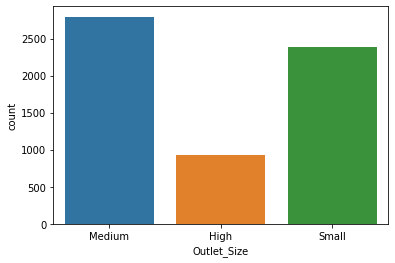

In [67]:
sns.countplot(df.Outlet_Size)

In [68]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [69]:
df.Outlet_Size.isnull().any()

True

In [70]:
df.shape

(8523, 9)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [72]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [73]:
df.Outlet_Size.mode()

0    Medium
dtype: object

In [81]:
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode())
df['Outlet_Size'] = df['Outlet_Size'].replace(to_replace=np.nan, value='Medium')

In [82]:
df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [83]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [84]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

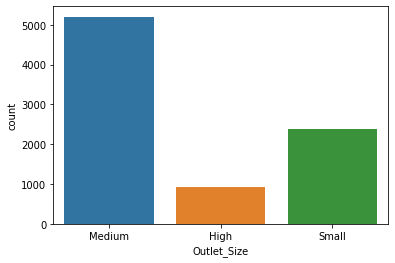

In [85]:
sns.countplot(df['Outlet_Size'])

In [86]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 599.4+ KB


In [90]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [92]:
print('Item_Fat_Content:',df['Item_Fat_Content'].unique())
print('Outlet_Size:',df['Outlet_Size'].unique())
print('Outlet_Location_Type:',df['Outlet_Location_Type'].unique())
print('Outlet_Type:',df['Outlet_Type'].unique())

Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet_Size: ['Medium' 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [94]:
df1 = pd.get_dummies(df['Item_Fat_Content'], prefix='Item_Fat_Content', prefix_sep='_', drop_first=True)
df2 = pd.get_dummies(df['Outlet_Size'], prefix='Outlet_Size', prefix_sep='_', drop_first=True)
df3 = pd.get_dummies(df['Outlet_Location_Type'], prefix='Outlet_Location_Type', prefix_sep='_', drop_first=True)
df4 = pd.get_dummies(df['Outlet_Type'], prefix='Outlet_Type', prefix_sep='_', drop_first=True)

In [95]:
df = pd.concat([df, df1, df2, df3, df4], axis=1)

In [96]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,0,0,0,1,0,0,0,1,0,0
1,5.92,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1,0,0,1,0,0,1,0,1,0
2,17.50,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,0,0,0,1,0,0,0,1,0,0
3,19.20,Regular,0.000000,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,0,1,0,0,1,0,0,1,0,0,0
4,8.93,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,0,0,0,0,0,1,1,0,0


In [97]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [98]:
df.drop(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1, inplace=True)

In [99]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,0,0,1,1,0,0


In [100]:
#splitting the dependent and independent variable fro the data set
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [101]:
# improting libraries to do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # importing the evalution metrices

In [102]:
#splitting the data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [103]:
# fiting the model
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [104]:
# predicting the value of y_pred for the given value of
y_pred = linear.predict(x_test)

In [105]:
#predicted value for x_test is
print(y_pred)

[ 560.93389486 1197.14400065 3246.50077119 ... 2654.85916274 2333.31086184
 2374.40345425]


In [106]:
r2_score(y_test, y_pred)

0.5616155547409414